# 환경 셋팅

In [1]:
!pip install numpy
!pip install pandas
!pip install yfinance
!pip install quantstats
!pip install finance-datareader
!pip install PyPortfolioOpt
!pip install pulp
!pip install pandas-datareader
!pip install streamlit

# 글꼴 설치
!apt -qq install fonts-nanum*

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


'apt'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [2]:
# matplotlib Setting
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (14,8)
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

In [11]:
import numpy as np
import pandas as pd
import yfinance as yf
import quantstats as qs
import FinanceDataReader as fdr
from backdata import tickers

# Trading

## quantsstats를 이용한 포트폴리오 심층분석

In [4]:
stock = qs.utils.download_returns('TQQQ')
stock

Date
2010-02-11         NaN
2010-02-12    0.004094
2010-02-16    0.038734
2010-02-17    0.016970
2010-02-18    0.018958
                ...   
2022-09-13   -0.164565
2022-09-14    0.022446
2022-09-15   -0.050341
2022-09-16   -0.019530
2022-09-19    0.023984
Name: Close, Length: 3173, dtype: float64

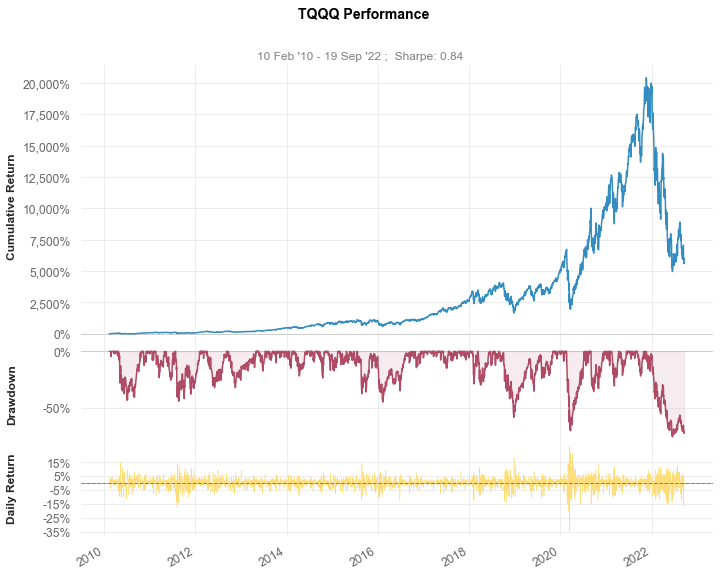

In [5]:
qs.plots.snapshot(stock, title='TQQQ Performance')

In [6]:
qs.reports.metrics(stock, mode ='basic')

                    Strategy
------------------  ----------
Start Period        2010-02-11
End Period          2022-09-19
Risk-Free Rate      0.0%
Time in Market      100.0%

Cumulative Return   5,738.17%
CAGR﹪              38.06%

Sharpe              0.84
Prob. Sharpe Ratio  99.84%
Sortino             1.17
Sortino/√2          0.83
Omega               1.17

Max Drawdown        -75.32%
Longest DD Days     431

Gain/Pain Ratio     0.17
Gain/Pain (1M)      1.08

Payoff Ratio        0.92
Profit Factor       1.17
Common Sense Ratio  1.09
CPC Index           0.6
Tail Ratio          0.93
Outlier Win Ratio   3.97
Outlier Loss Ratio  4.1

MTD                 -9.42%
3M                  11.12%
6M                  -52.62%
YTD                 -69.71%
1Y                  -64.58%
3Y (ann.)           16.87%
5Y (ann.)           20.25%
10Y (ann.)          34.03%
All-time (ann.)     38.06%

Avg. Drawdown       -6.89%
Avg. Drawdown Days  23
Recovery Factor     76.18
Ulcer Index         0.21
Serenity Index

## yfinance를 사용하여 종목 데이터 가져오기

In [7]:
usdkrw = yf.download(['USDKRW=X'],start='1991-01-01', end='2022-09-17')
usdkrw['Close']

[*********************100%***********************]  1 of 1 completed


Date
2003-12-01    1198.400024
2003-12-02    1195.000000
2003-12-03    1192.500000
2003-12-04    1190.099976
2003-12-05    1184.699951
                 ...     
2022-09-12    1379.060059
2022-09-13    1375.810059
2022-09-14    1393.469971
2022-09-15    1391.180054
2022-09-16    1398.630005
Name: Close, Length: 4874, dtype: float64

<AxesSubplot:xlabel='Date'>

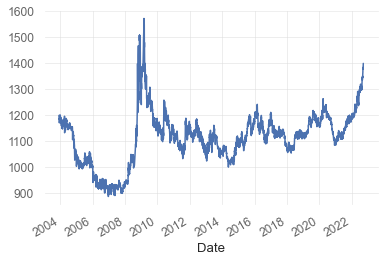

In [8]:
usdkrw['Close'].plot()

[*********************100%***********************]  1 of 1 completed


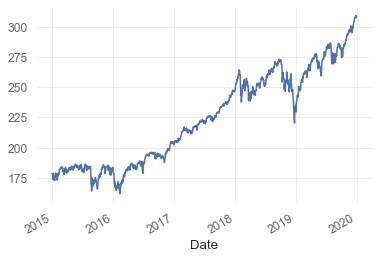

In [9]:
spy = yf.download('SPY','2015-01-01','2020-01-01')
spy["Adj Close"].plot()
plt.show()

[*********************100%***********************]  26 of 26 completed


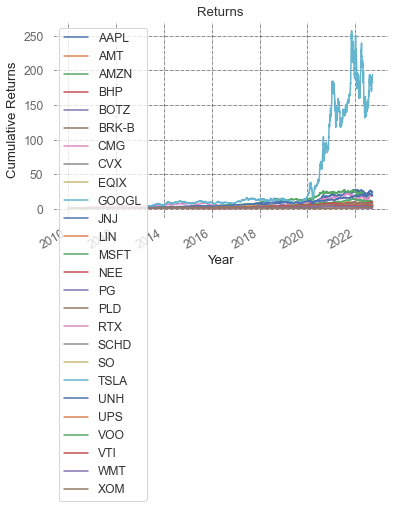

In [13]:
data = yf.download(tickers,'2010-1-1')['Adj Close']

# Plot all the close prices
((data.pct_change()+1).cumprod()).plot()

# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Returns")

# Define the labels for x-axis and y-axis
plt.ylabel('Cumulative Returns')
plt.xlabel('Year')

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [14]:
msft = yf.Ticker("MSFT")

In [15]:
# 마이크로소프트 자산운용사별 보유 수량
msft.institutional_holders

,Holder,Shares,Date Reported,% Out,Value
0,"Vanguard Group, Inc. (The)",628109007,2022-06-29,0.0842,153585217075
1,Blackrock Inc.,522551885,2022-06-29,0.0701,127774389152
2,State Street Corporation,293557993,2022-06-29,0.0394,71780801702
3,"FMR, LLC",207201641,2022-06-29,0.0278,50664946142
4,Price (T.Rowe) Associates Inc,195859819,2022-06-29,0.0263,47891643778
5,"Geode Capital Management, LLC",136945361,2022-06-29,0.0184,33485880256
6,Morgan Stanley,101931745,2022-06-29,0.0137,24924350722
7,Capital World Investors,98825477,2022-06-29,0.0133,24164806058
8,JP Morgan Chase & Company,91034485,2022-06-29,0.0122,22259752661
9,Capital Research Global Investors,86423951,2022-03-30,0.0116,21132384867


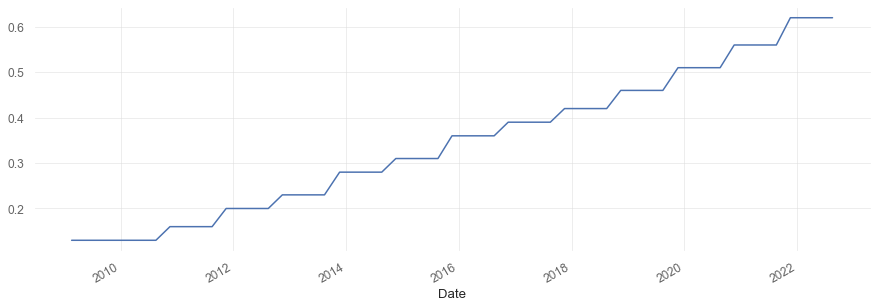

In [16]:
# 배당율
ax = msft.dividends.tail(55).plot(figsize=(15,5))

In [17]:
# 주식분할
msft.splits

Date
1987-09-21    2.0
1990-04-16    2.0
1991-06-27    1.5
1992-06-15    1.5
1994-05-23    2.0
1996-12-09    2.0
1998-02-23    2.0
1999-03-29    2.0
2003-02-18    2.0
Name: Stock Splits, dtype: float64

In [18]:
msft.recommendations.tail(10)

,Firm,To Grade,From Grade,Action
Date,,,,
2022-07-26 11:02:51,Rosenblatt,Buy,,main
2022-07-27 10:37:28,Citigroup,Buy,,main
2022-07-27 10:39:45,BMO Capital,Outperform,,main
2022-07-27 10:52:52,Wedbush,Outperform,,main
2022-07-27 11:08:34,Stifel,Buy,,main
2022-07-27 11:12:18,JP Morgan,Overweight,,main
2022-07-27 11:14:20,Deutsche Bank,Buy,,main
2022-07-27 12:50:51,Cowen & Co.,Outperform,,main
2022-07-29 09:11:53,Wolfe Research,Outperform,,main


In [19]:
# 실적 발표일
msft.calendar

,0,1
Earnings Date,2022-10-24 10:59:00,2022-10-28 12:00:00
Earnings Average,2.32,2.32
Earnings Low,2.25,2.25
Earnings High,2.43,2.43
Revenue Average,49903400000,49903400000
Revenue Low,49490000000,49490000000
Revenue High,51965000000,51965000000


### FinanceDataReader를 사용하여 FED 지표 확인

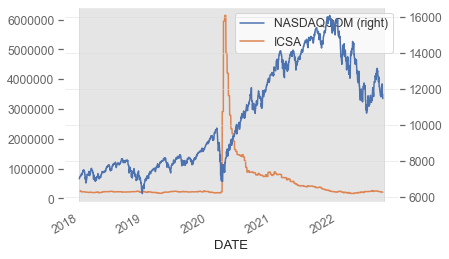

In [21]:
# ICSA: 주간 실업수당 청구 건수
df = fdr.DataReader(['NASDAQCOM', 'ICSA'], start='2018-01-01', data_source='fred')
ax = df.plot(secondary_y='NASDAQCOM')
ax = ax.axvspan('2018-01-01', '2022-09-20', color='gray', alpha=0.2)

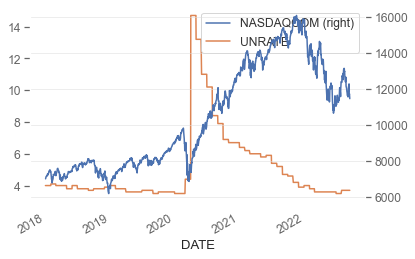

In [22]:
# UNRATE: 실업률
df = fdr.DataReader(['NASDAQCOM', 'UNRATE'], start='2018-01-01', data_source='fred')
ax = df.plot(secondary_y='NASDAQCOM')

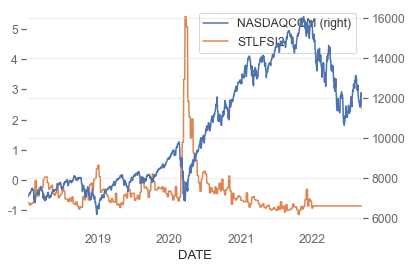

In [23]:
# STLFSI2: 금융스트레스 지수
df = fdr.DataReader(['NASDAQCOM', 'STLFSI2'], start='2018-01-01', data_source='fred')
ax = df.plot(secondary_y='NASDAQCOM')

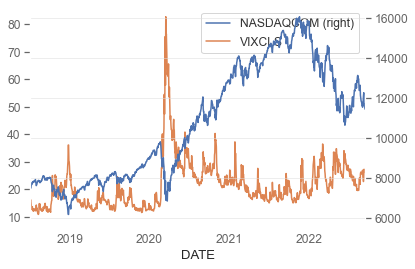

In [24]:
#VIX(변동성 지수)
df = fdr.DataReader(['NASDAQCOM', 'VIXCLS'], start='2018-07-01', data_source='fred')
ax = df.plot(secondary_y='NASDAQCOM')

[*********************100%***********************]  1 of 1 completed


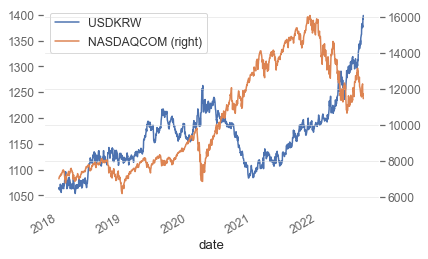

In [25]:
# 환율 VS. 나스닥
df_usdkrw = yf.download(['USDKRW=X'], start='2018-01-01')
df_nasdaq = fdr.DataReader(['NASDAQCOM'], start='2018-01-01', data_source='fred')
df_usdkrw.reset_index(inplace=True)
df_nasdaq.reset_index(inplace=True)
df_usdkrw['date'] = pd.to_datetime(df_usdkrw['Date'])
df_nasdaq['date'] = pd.to_datetime(df_nasdaq['DATE'])

df_usdkrw.drop(labels=['Date', 'Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace=True)
df_nasdaq.drop(labels=['DATE'], axis=1, inplace=True)

df = pd.merge(df_usdkrw, df_nasdaq, on='date')
df.rename(columns = {'Close' : 'USDKRW'}, inplace=True)
df.set_index('date', inplace=True)

ax = df.plot(secondary_y='NASDAQCOM')